# Datos.

1. Nombre: Luis Felipe Narváez Gómez 
2. Código: 2312660
3. Universidad Santo Tomas seccional Tunja
4. Facultad: Ingeniería de Sistemas
5. Asignatura: Electiva I - Deep Learning
6. Periodo: 2021-2

# Deep Learning

# Prediciendo un texto (cuento los tres cerditos),  usando la herramienta de Keras.

## Concideraciones a tener en cuenta

Algo que tenemos que tener encuenta a la hora de trabajar con las redes neuronales es que, mientras mas neuronas utilicemos, mientras mas niveles de cilos de aprendizaje le demos al sistema, mientras mas grande el volumen de datos trabajemos, mas cantidad de recursos vamos a pedir en hardware.

Las redes neuronales no estan hechas para trabajar precisamente con bases de datos pequeñas, tampoco para trabajar con pocas neuronas ni hacer pocas predicciones, por tal motivo se debe tener un hardware acorde para este nivel de procesamiento de la informacion.

A diferencia del Maching Learning clasico, donde podemos hacer uso de las CPU y nuesro principal limitantes es el numero de nucleos que este posee para ajecutar una proceso por vez en cadena, en el Deep Learning se utiliza la GPU donde por su arquitectura fisica nos permite ejecutar varias veces mas procesos en paralelo a la vez que la CPU.

Por este motivo algunas librerias como comando especificos existen en el DeepLearning que en el Maching Learningno, como es la activacion de la GPU en la maquina que estamos alquilando en Colab Google.

Al uzar una CPU de 32 nucleos, solo podremos utilizar 32 procesos de entrenamiento al tiempo, mientras que con una GPU estaremos hablando ya en los valores de 1000 procesos de entrenamiento en paralelo a la vez.

## Activar el uso de la GPU en Google Colab


Lo primero que debemos hacer antes de importar cualquier libreria es, en este caso que estamos trabajando en Colab Google, habilitar el uso de GPU por parte de los codigos que en el Notebook procesemos.

Para esto hay que ir a la barra de menus de colab y seleccionar "Entorno de Ejecucion" la opcion "cambiar tipo de entorno de ejecucion". Al picar o dar clic aqui, se desplegara una ventana que por defecto tendra la opcion de "None", esto quiere decir que los codigos que se escriban en el Colab se ejecutaran con la CPU.

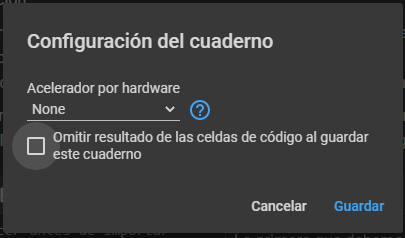

Esto lo cambiaremos por GPU, lo que hara que todo codigo que nosotros ejecutemos en el entorno de Colab se trataran con la GPU de la Maquina dada por Google y no por la CPU de la misma.

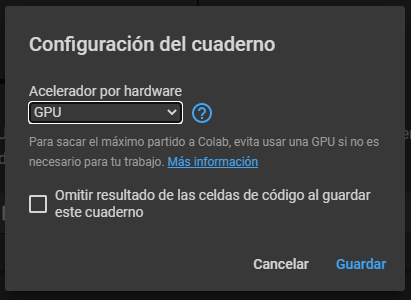

Cabe decir que para que el codigo que nosotros ejecutemos en el entorno de Colab use la GPU, no vasta con realizar el anterior procedimiento, si no que por codigo debemos decirle a la maquina que haga uso de este recurso, de lo contrario seguira utilizando la CPU como siempre lo hace por defecto el entorno de Google Colab.

El anterior paso es precisamente solo para habilitar el uso por codigo de la GPU, encenderla en el entorno de ejecucion para su posterior uso.

## Importar Librerias

In [ ]:
## manipulacion de archivos y carpetas
import io
import os

# libreria que nos permite conectarnos a una direccion online o una URL
import requests

# Para trabajar los asuntos de generacion de graficos (una de varias librerias que hay)
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16,9) #tamaño de la figura (ancho,alto)
plt.style.use('ggplot') # estilo grafico de las imagenes generadas

# guardar las imagenes y tablas en el notebook
%matplotlib inline

Libreria Desarrollado por Google para el uso de redes neuronales.

In [ ]:
#Librerias enfocadas al Deep Learning
import tensorflow as tf

In [ ]:
print("version: ",tf.__version__)
print("Eager mode: ",tf.executing_eagerly())
print("GPU is","available" if tf.config.list_logical_devices("GPU") else "Not Available")

version:  2.7.0
Eager mode:  True
GPU is available


In [ ]:
#Libreria de 
import numpy as np
#Para uso del tiempo
import time
#
import sys

In [ ]:
# Lista de librerias que se pueden utilizar
!pip list

## Activacion de la GPU

El uso de la GPU en el tema de redes neuronales puede llegar a aumentar la velocidad del entrenamiento en un 600% en PLN(RNN) y en temas de vision por computadora o vision artificia en un 1000%.

In [ ]:
tf.device('/cpu:0')

## Descargar y procesar los datos

El cuento que se va a utilizar es el de "Los tres cerditos", lo podemos encontrar en la ruta:

https://github.com/OnRuiso/Deep-Learning-/blob/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T15/Tres_cerditos.txt

O en forma de formato RAW:

https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T15/Tres_cerditos.txt

In [ ]:
# Lea el archivo de una url
fileUrl = 'https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T15/Tres_cerditos.txt'
# obtenga un archivo de nombre "Tres_cerditos" de la "URL" ingresada, con la utilidad de Keras de TensorFlow y guardelo en filecontent
fileContent = tf.keras.utils.get_file('Tres_cerditos.txt',fileUrl)
# abra el archvo adquirido por Keras, lealo y decodifiquelo utilizando el estandar de utf-8 para el idioma español
texto = open(fileContent,'rb').read().decode(encoding='utf-8')
#tome ese texto ya leido y decodificado y ponga todo en minusculas y guardelo en la variable raw_text
raw_text = texto.lower()

In [ ]:
print(raw_text)

había una vez tres cerditos que eran hermanos y se fueron por el mundo a conseguir fortuna. el más grande les dijo a sus hermanos que sería bueno que se pusieran a construir sus propias casas para estar protegidos. a los otros dos les pareció una buena idea, y se pusieron manos a la obra, cada uno construyó su casita.  - la mía será de paja - dijo el más pequeño-, la paja es blanda y se puede sujetar con facilidad. terminaré muy pronto y podré ir a jugar. el hermano mediano decidió que su casa sería de madera:  - puedo encontrar un montón de madera por los alrededores - explicó 
a sus hermanos, - construiré mi casa en un santiamén con todos estos troncos y me iré también a jugar.  cuando las tres casitas estuvieron terminadas, los cerditos cantaban y bailaban en la puerta, felices por haber acabado con el problema:  -¡quién teme al lobo feroz, al lobo, al lobo!  - ¡quién teme al lobo feroz, al lobo feroz! detrás de un árbol grande apareció el lobo, rugiendo de hambre y gritando:  - cer

## Pasar el texto a numeros


Las redes neuronales solo procesan valores numéricos, no letras, por tanto tenemos que traducir los caracteres a representación numérica. Para ello crearemos dos “tablas de traducción”: una de caracteres a números y otra de números a caracteres

sin importar el origen de la informacion (video, sonido, sensor, texto, etc) siempre debemos convertirlos en datos numericos para asi poderlos trabajar.

In [ ]:
# ordena los caracteres presentes en el texto de forma alfabetica como en una lista
# a cada uno de los caracteres listados asigname un numero ordenado

In [ ]:
chars = sorted(list(set(raw_text)))
char_to_int = dict((c,i) for i, c in enumerate(chars))

In [ ]:
print(chars)

['\n', ' ', '!', ',', '-', '.', ':', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'z', '¡', 'á', 'é', 'í', 'ñ', 'ó', 'ú']


In [ ]:
print(char_to_int)

{'\n': 0, ' ': 1, '!': 2, ',': 3, '-': 4, '.': 5, ':': 6, 'a': 7, 'b': 8, 'c': 9, 'd': 10, 'e': 11, 'f': 12, 'g': 13, 'h': 14, 'i': 15, 'j': 16, 'l': 17, 'm': 18, 'n': 19, 'o': 20, 'p': 21, 'q': 22, 'r': 23, 's': 24, 't': 25, 'u': 26, 'v': 27, 'x': 28, 'y': 29, 'z': 30, '¡': 31, 'á': 32, 'é': 33, 'í': 34, 'ñ': 35, 'ó': 36, 'ú': 37}


## Conociendo el Diccionario de Lenguaje

In [ ]:
n_chars = len(raw_text)
n_vocab = len(chars)

In [ ]:
print("En total hay %d caracteres y el diccionaio tienen un tamaño de %d caracteres." % (n_chars, n_vocab))

En total hay 3139 caracteres y el diccionaio tienen un tamaño de 38 caracteres.


Analogicamente lo que hace esta seccion del codigo es contar cuantos caracteres tiene el texto sin repetirce , los organiza y les da un valor nummerico, por ejemplo:

1. hola buenos dias
2. "espacio"-a-b-d-e-h-i-l-n-o-s--u 
3. 0---------1-2-3-4-5-6-7-8-9-10-11
4. "3 9 7 1"_"0"_"2 11 4 8 9 10"_"0"_"3 6 1 10"

Al introducir esta sucesion de numeros dentro de la red neuronal, esta aprede que despues del numero 0 debera seguir el numero 1, asi como despues del 9 sigue el 10. Para formar Hola sabra que la sucesion sera 3 9 7 1 , aprendiendo en su efecto palabras.

A la final son los 38 caracteres los que utiolizaremos para entrenar la red neuronal.

1. Una capa de entrada, con 38 neuronas

2. Una Capa densa, o de entrenamiento

3. Una Capa de salida, decir que numero ( caracter ) sera acontinuacion de la que ha entrado, hayando palabras en terminos matematicos.

Ahora bien, exite un inconveniente, y es que no podemos mandarle todo un grupo enorme de texto a la red neuronal, pues debemos tener en cuenta que tenemos un total de 3139 caracteres.

## Dividimos el texto en secuencias

Dividimos el texto en estas secuencias (adrede), convertimos los caracteres a números enteros usando nuestra tabla de búsqueda que preparamos anteriormente

Lo siguiente tomara el texto completo de 3139 caracteres y tomara cachitos o trozos de texto cada 50 caracteres. este ultimo numero es arbitrario y le dara una idea a la red neuronal de que cadena de caracteres sera a continuacion de la que ingresemos, es decir, si yo le ingreso por ejemplo "Habia una vez", el predecira "tres cerditos", formando el texto "habia una vez tres cerditos".

In [ ]:
# preparar el conjunto de datos de los pares de entrada a salida codificados como enteros
seq_length = 50   #largo de las secciones de texto que usaremos para entrenar
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	print("Seq(",i,")=",raw_text[i:i + seq_length],"---->",raw_text[i + seq_length])
	seq_in 	= raw_text[i:i + seq_length]         					#secuencia de entrada
	seq_out = raw_text[i + seq_length]										#siguiente letra despues de la secuencia (la que el va a aprender)
	dataX.append([char_to_int[char] for char in seq_in])  # convertimos cada secuencia en numeros
	dataY.append(char_to_int[seq_out])
 
n_patterns = len(dataX)


El entrenamiento seria algo tal que:

Seq( 0 )= había una vez tres cerditos que eran hermanos y se ---->  

Seq( 1 )= abía una vez tres cerditos que eran hermanos y se  ----> f

Seq( 2 )= bía una vez tres cerditos que eran hermanos y se f ----> u

Seq( 3 )= ía una vez tres cerditos que eran hermanos y se fu ----> e

Seq( 4 )= a una vez tres cerditos que eran hermanos y se fue ----> r

Seq( 5 )=  una vez tres cerditos que eran hermanos y se fuer ----> o

Seq( 6 )= una vez tres cerditos que eran hermanos y se fuero ----> n

Seq( 7 )= na vez tres cerditos que eran hermanos y se fueron ---->  

Seq( 8 )= a vez tres cerditos que eran hermanos y se fueron  ----> p

Seq( 9 )=  vez tres cerditos que eran hermanos y se fueron p ----> o

Seq( 10 )= vez tres cerditos que eran hermanos y se fueron po ----> r

...

Seq( 3078 )= l lobo, al lobo!  - ¡quién teme al lobo feroz, al  ----> l

Seq( 3079 )=  lobo, al lobo!  - ¡quién teme al lobo feroz, al l ----> o

Seq( 3080 )= lobo, al lobo!  - ¡quién teme al lobo feroz, al lo ----> b

Seq( 3081 )= obo, al lobo!  - ¡quién teme al lobo feroz, al lob ----> o

Seq( 3082 )= bo, al lobo!  - ¡quién teme al lobo feroz, al lobo ---->  

Seq( 3083 )= o, al lobo!  - ¡quién teme al lobo feroz, al lobo  ----> f

Seq( 3084 )= , al lobo!  - ¡quién teme al lobo feroz, al lobo f ----> e

Seq( 3085 )=  al lobo!  - ¡quién teme al lobo feroz, al lobo fe ----> r

Seq( 3086 )= al lobo!  - ¡quién teme al lobo feroz, al lobo fer ----> o

Seq( 3087 )= l lobo!  - ¡quién teme al lobo feroz, al lobo fero ----> z

Seq( 3088 )=  lobo!  - ¡quién teme al lobo feroz, al lobo feroz ----> !

In [ ]:
print("Se generaron ",format(n_patterns) ," secuencias texto de un tamaño de ",seq_length," caracteres" )

Se generaron  3089  secuencias texto de un tamaño de  50  caracteres


In [ ]:
print("Como se ven los datos de X convertidos a números\n")
print(dataX)

Como se ven los datos de X convertidos a números

[[14, 7, 8, 34, 7, 1, 26, 19, 7, 1, 27, 11, 30, 1, 25, 23, 11, 24, 1, 9, 11, 23, 10, 15, 25, 20, 24, 1, 22, 26, 11, 1, 11, 23, 7, 19, 1, 14, 11, 23, 18, 7, 19, 20, 24, 1, 29, 1, 24, 11], [7, 8, 34, 7, 1, 26, 19, 7, 1, 27, 11, 30, 1, 25, 23, 11, 24, 1, 9, 11, 23, 10, 15, 25, 20, 24, 1, 22, 26, 11, 1, 11, 23, 7, 19, 1, 14, 11, 23, 18, 7, 19, 20, 24, 1, 29, 1, 24, 11, 1], [8, 34, 7, 1, 26, 19, 7, 1, 27, 11, 30, 1, 25, 23, 11, 24, 1, 9, 11, 23, 10, 15, 25, 20, 24, 1, 22, 26, 11, 1, 11, 23, 7, 19, 1, 14, 11, 23, 18, 7, 19, 20, 24, 1, 29, 1, 24, 11, 1, 12], [34, 7, 1, 26, 19, 7, 1, 27, 11, 30, 1, 25, 23, 11, 24, 1, 9, 11, 23, 10, 15, 25, 20, 24, 1, 22, 26, 11, 1, 11, 23, 7, 19, 1, 14, 11, 23, 18, 7, 19, 20, 24, 1, 29, 1, 24, 11, 1, 12, 26], [7, 1, 26, 19, 7, 1, 27, 11, 30, 1, 25, 23, 11, 24, 1, 9, 11, 23, 10, 15, 25, 20, 24, 1, 22, 26, 11, 1, 11, 23, 7, 19, 1, 14, 11, 23, 18, 7, 19, 20, 24, 1, 29, 1, 24, 11, 1, 12, 26, 11], [1, 26, 19, 7, 1, 

In [ ]:
print("\nComo se ven los datos de Y convertidos a números\n")
print(dataY)


Como se ven los datos de Y convertidos a números

[1, 12, 26, 11, 23, 20, 19, 1, 21, 20, 23, 1, 11, 17, 1, 18, 26, 19, 10, 20, 1, 7, 1, 9, 20, 19, 24, 11, 13, 26, 15, 23, 1, 12, 20, 23, 25, 26, 19, 7, 5, 1, 11, 17, 1, 18, 32, 24, 1, 13, 23, 7, 19, 10, 11, 1, 17, 11, 24, 1, 10, 15, 16, 20, 1, 7, 1, 24, 26, 24, 1, 14, 11, 23, 18, 7, 19, 20, 24, 1, 22, 26, 11, 1, 24, 11, 23, 34, 7, 1, 8, 26, 11, 19, 20, 1, 22, 26, 11, 1, 24, 11, 1, 21, 26, 24, 15, 11, 23, 7, 19, 1, 7, 1, 9, 20, 19, 24, 25, 23, 26, 15, 23, 1, 24, 26, 24, 1, 21, 23, 20, 21, 15, 7, 24, 1, 9, 7, 24, 7, 24, 1, 21, 7, 23, 7, 1, 11, 24, 25, 7, 23, 1, 21, 23, 20, 25, 11, 13, 15, 10, 20, 24, 5, 1, 7, 1, 17, 20, 24, 1, 20, 25, 23, 20, 24, 1, 10, 20, 24, 1, 17, 11, 24, 1, 21, 7, 23, 11, 9, 15, 36, 1, 26, 19, 7, 1, 8, 26, 11, 19, 7, 1, 15, 10, 11, 7, 3, 1, 29, 1, 24, 11, 1, 21, 26, 24, 15, 11, 23, 20, 19, 1, 18, 7, 19, 20, 24, 1, 7, 1, 17, 7, 1, 20, 8, 23, 7, 3, 1, 9, 7, 10, 7, 1, 26, 19, 20, 1, 9, 20, 19, 24, 25, 23, 26, 29, 36, 1,

## Preparar nuestros datos de entrenamiento

1. Primero debemos transformar la lista de secuencias de entrada en la forma [muestras, pasos de tiempo, características] esperada por una red LSTM.
2. Luego debemos cambiar la escala de los números enteros al rango de 0 a 1 para que los patrones sean más fáciles de aprender mediante la red LSTM que utiliza la función de activación sigmoidea de forma predeterminada.
3. Por ultimo necesitamos convertir los patrones de salida (caracteres individuales convertidos en enteros) en una codificación one hot. Esto es para que podamos configurar la red para predecir la probabilidad de cada uno de los 54 caracteres diferentes en el vocabulario (una representación más fácil)

In [ ]:
#transformar la lista X de secuencias de entrada en la forma [muestras (3091), pasos de tiempo, características]
X = np.reshape(dataX, (n_patterns, seq_length, 1))
# normalizar (cambiar la escala de los números enteros al rango de 0 a 1 )
X = X / float(n_vocab)
# convertir los patrones de salida (caracteres individuales convertidos en enteros) en una codificación one hot.
y = tf.keras.utils.to_categorical(dataY)

## Construcción del modelo RNN

Definimos nuestro modelo LSTM: Aquí definimos una única capa LSTM oculta con 256 unidades de memoria, es decir que podra recordar hasta 256 caracteres visto de una forma temporal o 256 caracteres en el pasado a la actual secuencia que se lleva. El valor de 256 es un valor arbitrario puede ser 15 , como puede ser 10000, como puede ser 1080, como puede ser 16,etc; es arbitraio.

La red usa deserción con una probabilidad de 20.

La capa de salida es una capa densa que usa la función de activación softmax para generar una predicción de probabilidad para cada uno de los 38 caracteres entre 0 y 1.

In [ ]:
# define the LSTM model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(256, input_shape=(X.shape[1], X.shape[2])))    #creamos una capa con 256 unidades de memoria
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(y.shape[1], activation='softmax'))            #Softmax convierte un vector de valores en una distribución de probabilidad para cada uno de los 39
                                                                              #Softmax se utiliza a menudo como la activación para la última capa de una red de clasificación
#utilizamos el algoritmo de optimización de ADAM para la velocidad
model.compile(loss='categorical_crossentropy', optimizer='adam')

## Creando chekpoints

La red es lenta de entrenar (alrededor de 300 segundos por época) teniendo activa la GPU, ASí que crearemos CHECKPOINTS (puntos de control) para registrar todos los pesos de la red para archivar cada vez que se observe una mejora en la pérdida al final de la época. Usaremos el mejor conjunto de pesos (menor pérdida) para instanciar nuestro modelo generativo en la siguiente sección

In [ ]:
# definimos  una carpeta para guardar los checkpoint

# recordemos que verbose 1, mostrara cada ciclo de aprendizaje. 
# Un ciclo va desde que entra la cadena de caracteres a la red , cruza por las 
# capas y da un resultado a la salida.

filepath="checkpoints/weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=0, save_best_only=True, mode='min')
callbacks_list = [checkpoint]


## Entrenamiento

In [ ]:
# recordemos que verbose 1, mostrara cada ciclo de aprendizaje. 
# Un ciclo va desde que entra la cadena de caracteres a la red , cruza por las 
# capas y da un resultado a la salida.

# x = texto del cuento
# y = letra asociado a la siguiente letra del texto (version numerica)

#epochs = ciclos de entrenamiento para la red neuronal. Realizara los ciclos tratando de 
#tener un nivel de tolerancia al error menor  igual al especificado.

# batch_size = agrupaciones de 128 tuplas, valor arbitrario.

history = model.fit(X, y, epochs=1000, batch_size=128, verbose=0,callbacks=callbacks_list)

Por cada buen entrenamiento, enos a Dropout (0,2) guardara un punto de guardado de ese buen entrenamiento en la carpeta de colab de este proyecto especifico.

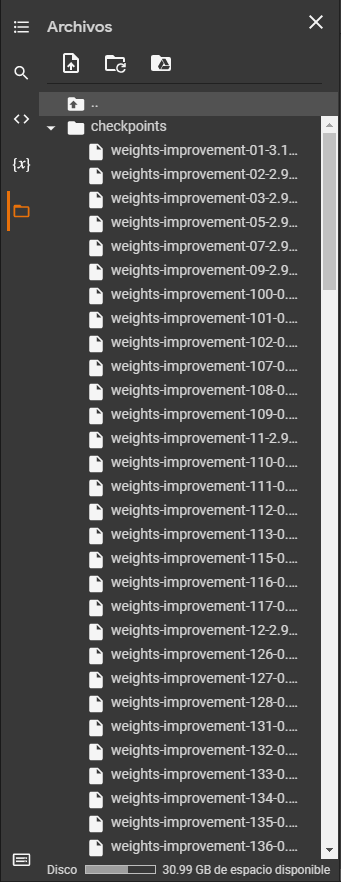

## Generando texto con una red LSTM

Vamos a cargar el ultimo CHECKPOINT de entrenamiento y con el haremos MAGIA!!!

El ultimo checkpoint sera la mejor de las predicciones , pues solo guarda aquella con menor tolerancia al error.

image.png

Damos clic en los puntos laterales y seleccionamos la opcion de "copiar ruta, la misma la pondremos en filename.
Aqui podemos darnos cuenta que mientras mas grande sea la tupla, el mejor checkpoint se dara en un cilo muy tardio , lo que quiere decir que la red neuronal aprendio poco.

Sin embargo, si mandamos tuplas pequeñas, el mejor checkpoint se dara a los pocos ciclos de entrenamiento, queriendo decir que la red neuronal, habra aprendido bien. El problema es que se demorara aun mas en el entrenamiento y por ende consumira muchos recursos.

In [ ]:
filename = "/content/checkpoints/weights-improvement-99-0.2604.hdf5" # este archivo de extencion HDF5 es el que se exporta y el que se vende
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

## Mapeo inverso (números a letras)

In [ ]:
int_to_char = dict((i, c) for i, c in enumerate(chars))

Creamos un mapeo inverso que podamos usar para convertir los números enteros nuevamente en caracteres para que podamos entender las predicciones

## Hacer predicciones

La forma más sencilla de utilizar el modelo Keras LSTM para hacer predicciones es comenzar primero con una secuencia semilla como entrada, generar el siguiente carácter y luego actualizar la secuencia semilla para agregar el carácter generado al final y recortar el primer carácter. Este proceso se repite mientras queramos predecir nuevos caracteres (por ejemplo, una secuencia de 1000 caracteres de longitud).

In [ ]:
# elige una semilla al azar
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print ("Semilla:")
print ("\"" + " ".join([int_to_char[value] for value in pattern])+"\"")
# generación de 10000 caracteres
for i in range(1000):
	x = np.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = np.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print ("\nDone.")

Semilla:
"  o b r a ,   c a d a   u n o   c o n s t r u y ó   s u   c a s i t a .     -   l a   m í a   s e r"
á de paja - dijo el más pequeño-, la paja es blanda y se puede sujetar con facilidad. terminaré muy pronto y podré ir a jugar. el hermano mediano decidió que su casa sería de madera:  - puedo encontrar un montón de madera por los alrededores - explicó 
a sus hermanos, - construiré mi casa en un santiamén con todos estos troncos y me iré también a jugar.  cuando las pres casitas estuiiertn  eecadii tesod ee ledoialos,ed carera -- puesén teme al lobo feroz, al lobo, al lobo!  - ¡quién teme al lobo feroz, al lobo feroz! - cantaban desde dentro los cerditos.  le oueoo  - ccuuinne e sus rr lo poadandd d daarue de le olo cosdi decmeriido ee pusrtaad so  esrizn desu  ellib...  enuu nnrée abrossa le pa pueota y nop r re dedeado. oadoanoó pue lo caseeee yaneraro tanop el cadire d lededr cacuieee ln mariino , sup er lanoa es lediiro soe lo lo vue yeena y ceriirn y lo la caeita de ladril

## Mejorando la red (una LSTM más grande)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(256))                                                                #agregaremos una segunda capa. 
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')
#cambiamos el nombre de archivo de los pesos con puntos de control para que 
#podamos distinguir entre los pesos de esta red 
filepath="weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"

## Mejoramos el entrenamiento

Aumentamos las epoch y disminuiremos el tamaño del lote de 128 a 64 para darle a la red más oportunidades de actualizarse y aprender.

In [ ]:
#los tiempos de entrenamiento aumentaran al doble que en la versión anterior

# x = texto del cuento
# y = letra asociado a la siguiente letra del texto (version numerica)

#epochs = ciclos de entrenamiento para la red neuronal. Realizara los ciclos tratando de 
#tener un nivel de tolerancia al error menor  igual al especificado.

# batch_size = agrupaciones de 64 tuplas, valor arbitrario.
model.fit(X, y, epochs=50, batch_size=64, callbacks=callbacks_list)

En este caso, las tuplas son mas pequeñas, asegurando que aprenda mejor la red neuronal, no se necesitan muchos ciclos de entrenamiento ya que se le dio mayor memoria para los checkpoint. en estos casos se puede ver si recuros, memoria, velocidad y ciclos ; son parametros que estimar en nuestras redes neuronales.

## Haciendo predicciones

In [ ]:
# elige una semilla al azar
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print ("Semilla:")
print ("\"" + " ".join([int_to_char[value] for value in pattern])+"\"")
# generación de caracteres
for i in range(1000):
	x = np.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = np.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print ("\nDone.")

Semilla:
"t a   d e r r i b a r é !     y   s e   p u s o   a   s o p l a r   t a n   f u e r t e   c o m o  "
el viento de invierno. sopló y sopló  pero la casita de ladrillos era muy resistente y no conseguía derribarla. decidió trepar por la pared y entrar por la chimenea. se deslizó hacia abajo... y cayó en el caldero donde el cerdito mayor estaba hirviendo sopa de nabos. escaldado y con el estómago vacío salió huyendo hacia el lago. los cerditos no lo volvieron a ver.  el mayor de ellos regañó a los otros dos por haber sido tan perezosos y poner en peligro sus propias casasapas pareron pon poy ha pugrta  - no, no, no, no te vamos a abrir. - pues si no me abrís... 
¡soplaré y soplaré y la casita derribaré! y sopló con todas sus fuerzas, sopló y sopló y la casita derribaré! y sopló con todas sus fuerzas, sopló y sopló y la casita derribaré! y sopló con todas sus fuerzas, sopló y sopló y la casita derribaré! y sopló con todas sus fuerzas, sopló y sopló y la casita derribaré! y sopló 